In [21]:
# 라이브러리 호출
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.preprocessing import StandardScaler    # 표준화
from sklearn.metrics.cluster import adjusted_rand_score

In [22]:
# 한글 설정
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


### 데이터 스케일 조정
* 성능 향상 및 일반화

In [23]:
scaler = StandardScaler() #표준화 평균 0, 분산 1
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[1:15]

array([[ 1.28731953, -1.2803031 ],
       [-0.59397643,  0.04357482],
       [-1.74182239, -0.66371706],
       [ 1.45705144, -0.85667812],
       [ 1.58953574, -0.59675854],
       [ 0.54875768, -0.08552893],
       [ 0.44914675, -1.50218876],
       [ 0.46138047,  0.23124986],
       [ 0.71117525, -1.59382202],
       [-0.98693652,  1.16613579],
       [-0.28618307, -0.9941549 ],
       [ 1.51445888, -0.7760272 ],
       [ 0.82589866, -1.33505302],
       [-1.51451022,  0.79027655]])

In [24]:
# 조정된 값
print(X_scaled.shape)

# 평균 및 분산
print('{:.7f},{}'.format(np.mean(X_scaled),np.std(X_scaled)))

(200, 2)
-0.0000000,1.0


Text(0.5, 1.0, '스케일된 데이터')

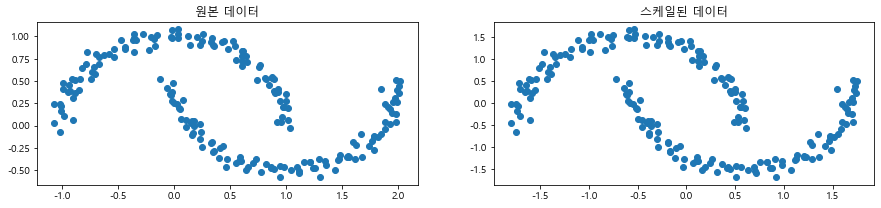

In [25]:
matplotlib.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 2, figsize=(15,3) )

# 무작위로 할당한 클러스터를 그린다.
axes[0].scatter(X[:,0], X[:,1])
axes[0].set_title("원본 데이터")

# 무작위로 할당한 클러스터를 그린다.
axes[1].scatter(X_scaled[:,0], X_scaled[:,1])
axes[1].set_title("스케일된 데이터")

### ARI (Adjusted Rand Index)
* 타깃값을 아는 경우에 쓰임.
* 데이터 클러스터링에서 rand index 값은 두 데이터 클러스트링간의 유사성의 특성값

In [26]:
from sklearn.cluster import AgglomerativeClustering # 병합 군집
from sklearn.cluster import KMeans # K-Mediod
from sklearn.cluster import DBSCAN # 밀도를 이용한 군집 방법

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

In [28]:
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()] # DBSCAN에 설정할 파라미터 - eps, mean_sammple

In [29]:
random_state = np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0,high=2,size=len(X))
random_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

### 군집 알고리즘을 평가하는 지표
* ARI
* NMI

Text(0.5, 1.0, '무작위 할당 - ARI:0.00')

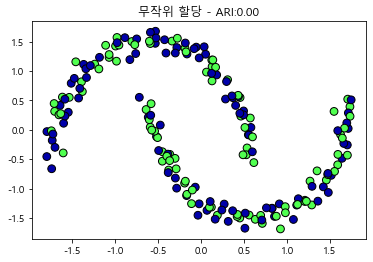

In [30]:
# 무작위로 할당한 클러스터를 그린다.
print(mglearn.cm3)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters,   cmap=mglearn.cm3, s=60, edgecolors='black') # s= 점 크기

plt.title("무작위 할당 - ARI:{:.2f}".format(adjusted_rand_score(y, random_clusters)))

### 알고리즘 비교
* 첫번째 그래프 : 무작위 할당
* 두번째 그래프 : K-Means
* 세번째 그래프 : AgglomerativeClustering : 병합 군집
* 네번째 그래프 : DBSCAN

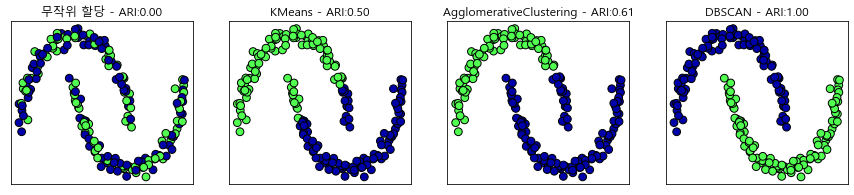

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw = {'xticks':(), 'yticks':()})

# 무작위로 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:,0], X_scaled[:,1],  c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
# s = 점 크기 

axes[0].set_title("무작위 할당 - ARI:{:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그린다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI:{:.2f}".format (algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [32]:
### 실제 예
from sklearn.metrics import accuracy_score

clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]

# 모든 레이블이 달라졌으므로 정확도는 0이다.
print("정확도 : {:.2f}".format(accuracy_score(clusters1, clusters2)))

# 같은 포인트가 한 클러스터에 모였으므로 ARI는 1이다.
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도 : 0.00
ARI: 1.00


### 실루엣 점수를 이용한 평가
* 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타내는 지표
    * 클러스터 안의 거리가 짧으면 좋고(cohesion).
    * 다른 클러스터와 비교해서 먼 것이 좋다.(separation)
    * 실루엣 점수는 -1~1까지의 값을 갖는다.
    * 값이 높을 수록 좋다.


In [33]:
from sklearn.metrics.cluster import silhouette_score

In [34]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [36]:
# 사용할 알고리즘 모델의 리스트를 만들기
algorithms = [KMeans(n_clusters=2), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터를 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))


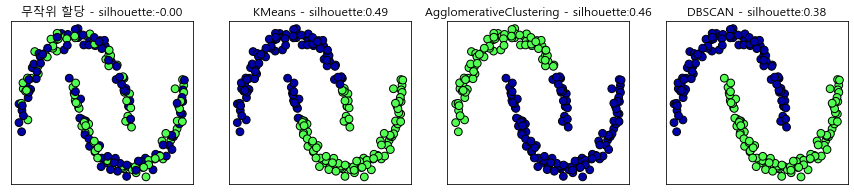

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                        subplot_kw = {'xticks':(), 'yticks':()})

# 무작위로 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:,0], X_scaled[:,1],  c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')

# 실루엣 스코어
axes[0].set_title("무작위 할당 - silhouette:{:.2f}".format(silhouette_score(X_scaled, random_clusters)))


for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그린다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,
               cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} - silhouette:{:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))